# Obdelava 68. vaje

## Fotoefekt

Gregor Žunič, 1.4.2020

In [50]:
import csv
from scipy.optimize import curve_fit
import scipy.constants as const
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image

### Prvi del

$\lambda = 365 \: nm$

Iz dnevnika sem prepisal podatke v csv datoteko.

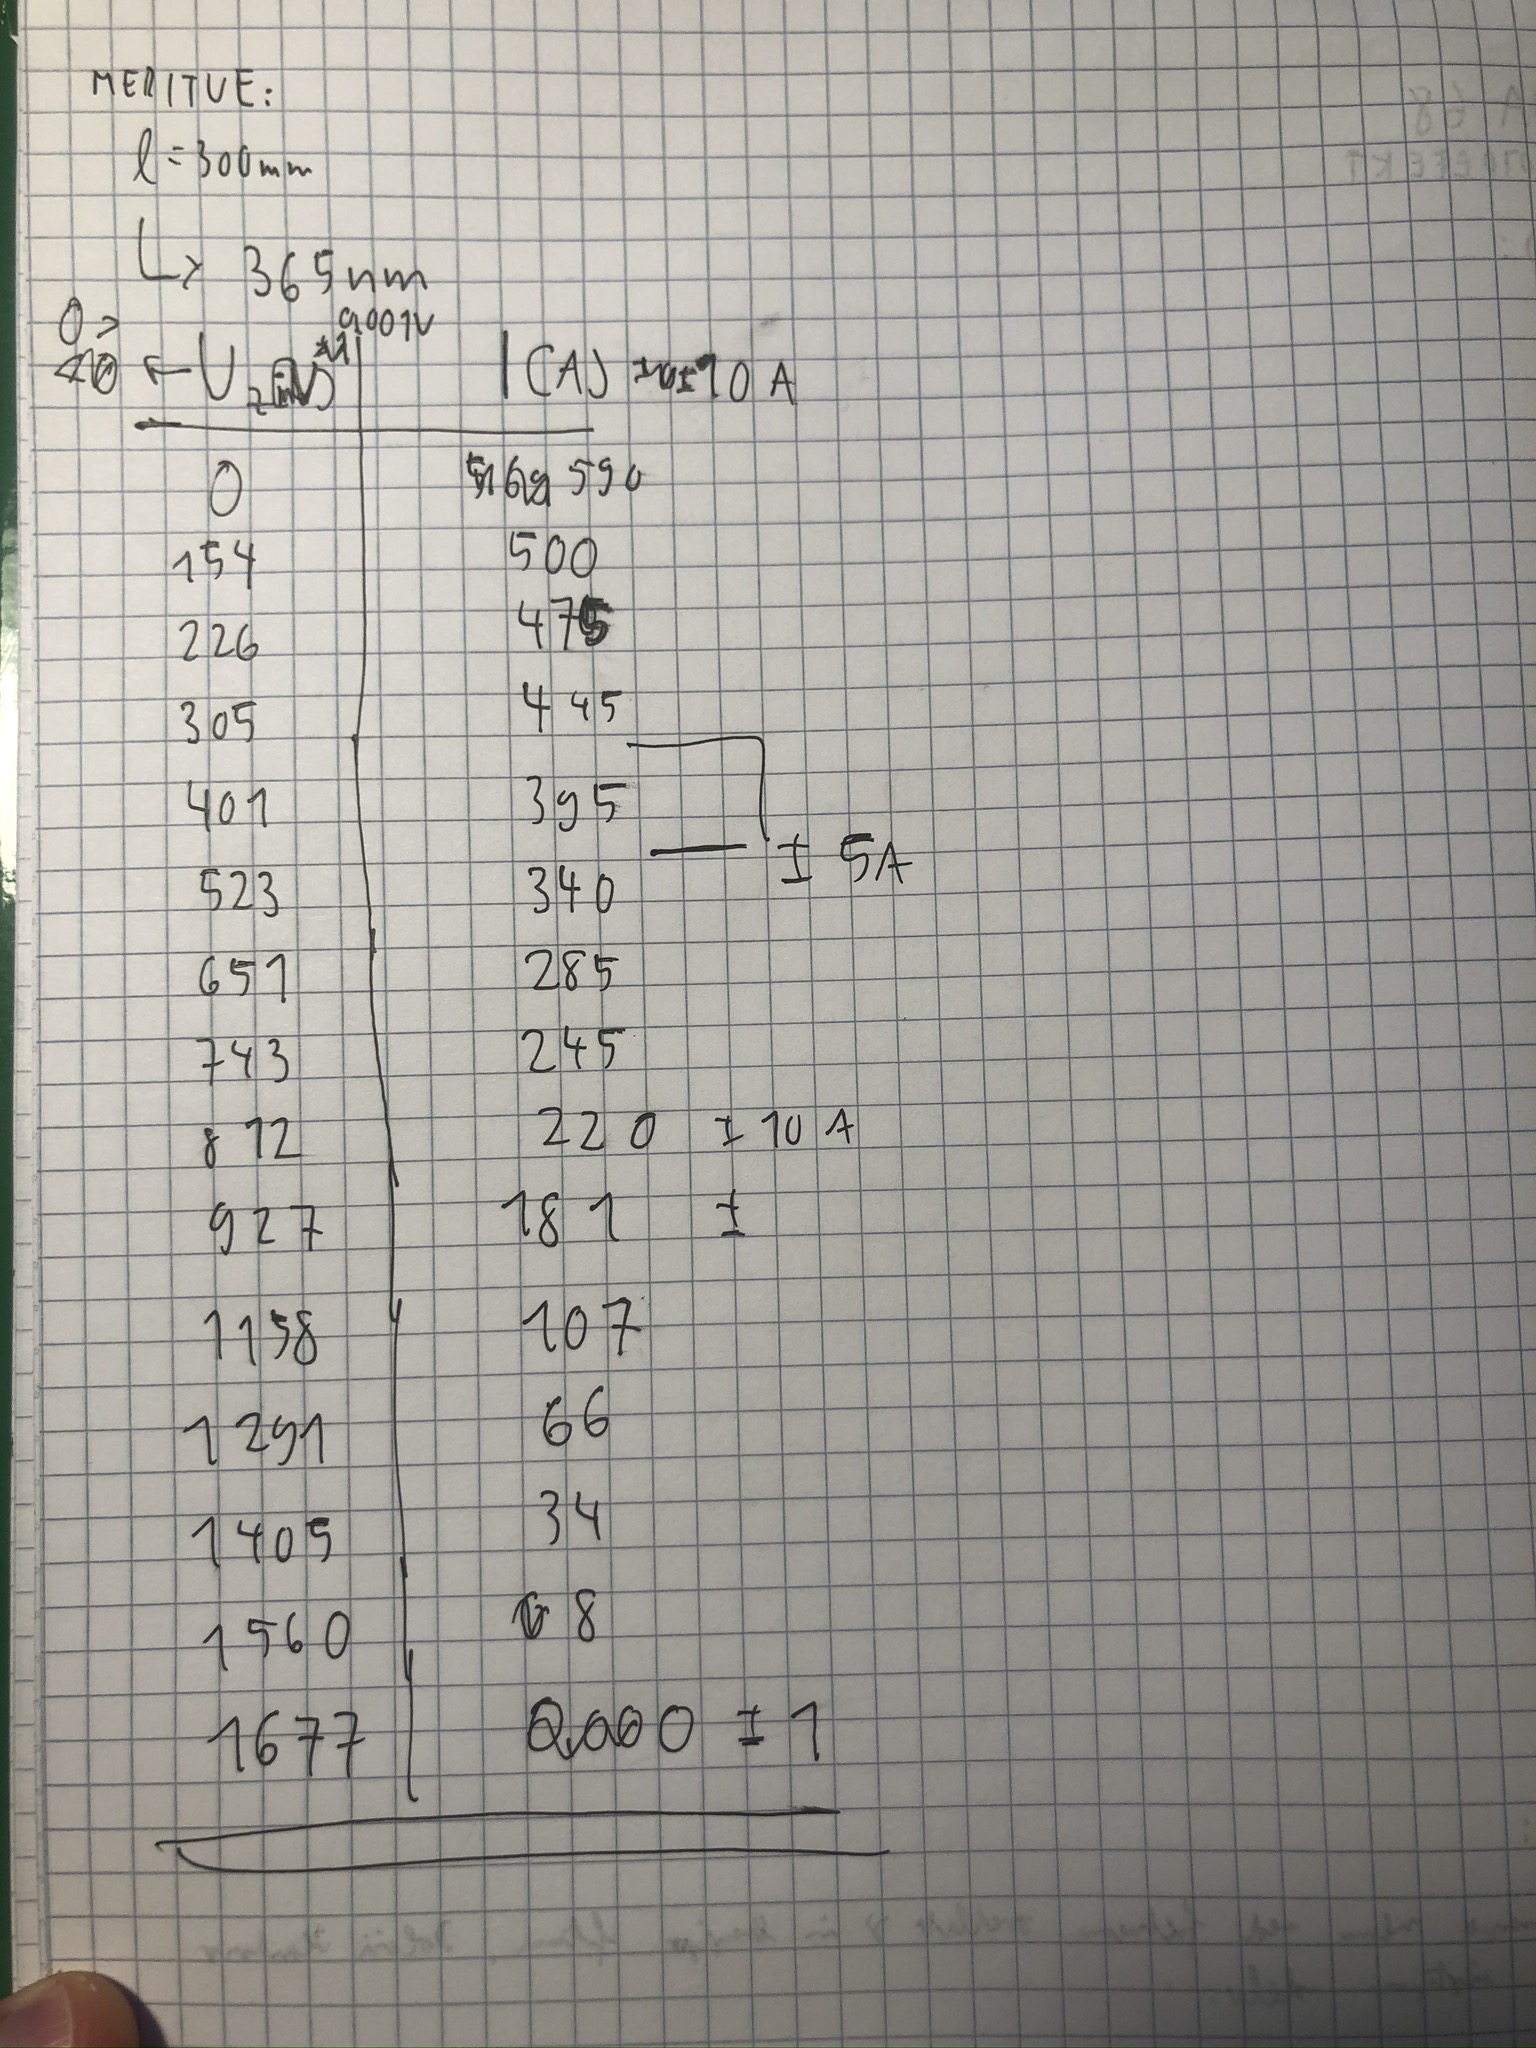

In [68]:
Image(filename='meritve.JPEG',width=500)

In [52]:
data = pd.read_csv('lambda_365nm.csv')

lightspeed = 299792458 # m/s

Uz = list(data['Uz']) # mV
I = list(data['I']) # A

display(data)

,Uz,I
0,0,590
1,154,500
2,226,475
3,305,445
4,401,395
5,523,340
6,651,285
7,743,245
8,812,220
9,927,181


In [53]:
def fit_func(x, a, b):
    return x*a+b

x = Uz
y = I

In [54]:
params = curve_fit(
    fit_func, x[:-2], y[:-2])
a = params[0][0]
b = params[0][1]

# CALCULATE ERRORS FROM MATRIX
errs = np.sqrt(np.diag(params[1]))
print('naklon grafa: a =', a,'+-',errs[0], '\nb =', b,'+-',errs[1])

naklon grafa: a = -0.3927455546631995 +- 0.011676096454002227 
b = 558.3877529134271 +- 9.204221433180102


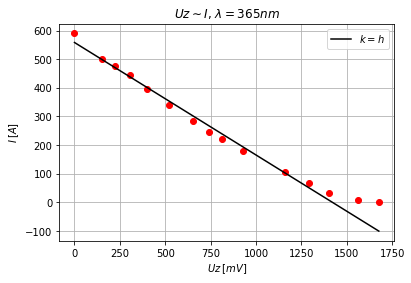

In [55]:
x_fit = np.linspace(x[0], x[-1], 100)

y_fit = fit_func(x_fit, a, b)

plt.plot(x, y, 'or')
plt.plot(x_fit, y_fit,'k', label=r'$k = h$')

plt.title(r'$Uz \sim I$, $\lambda = 365 nm$')
plt.xlabel(r'$Uz \: [mV]$')
plt.ylabel(r'$I \: [A]$')

plt.grid(True)

plt.legend()
plt.show()

Iz grafa je očitno, da velja linearna zveza med zaporno napetostjo ($U_m$) in tokom ($I$), ki ga proizvedejo elektroni.

## Za vse

$\lambda \neq const$

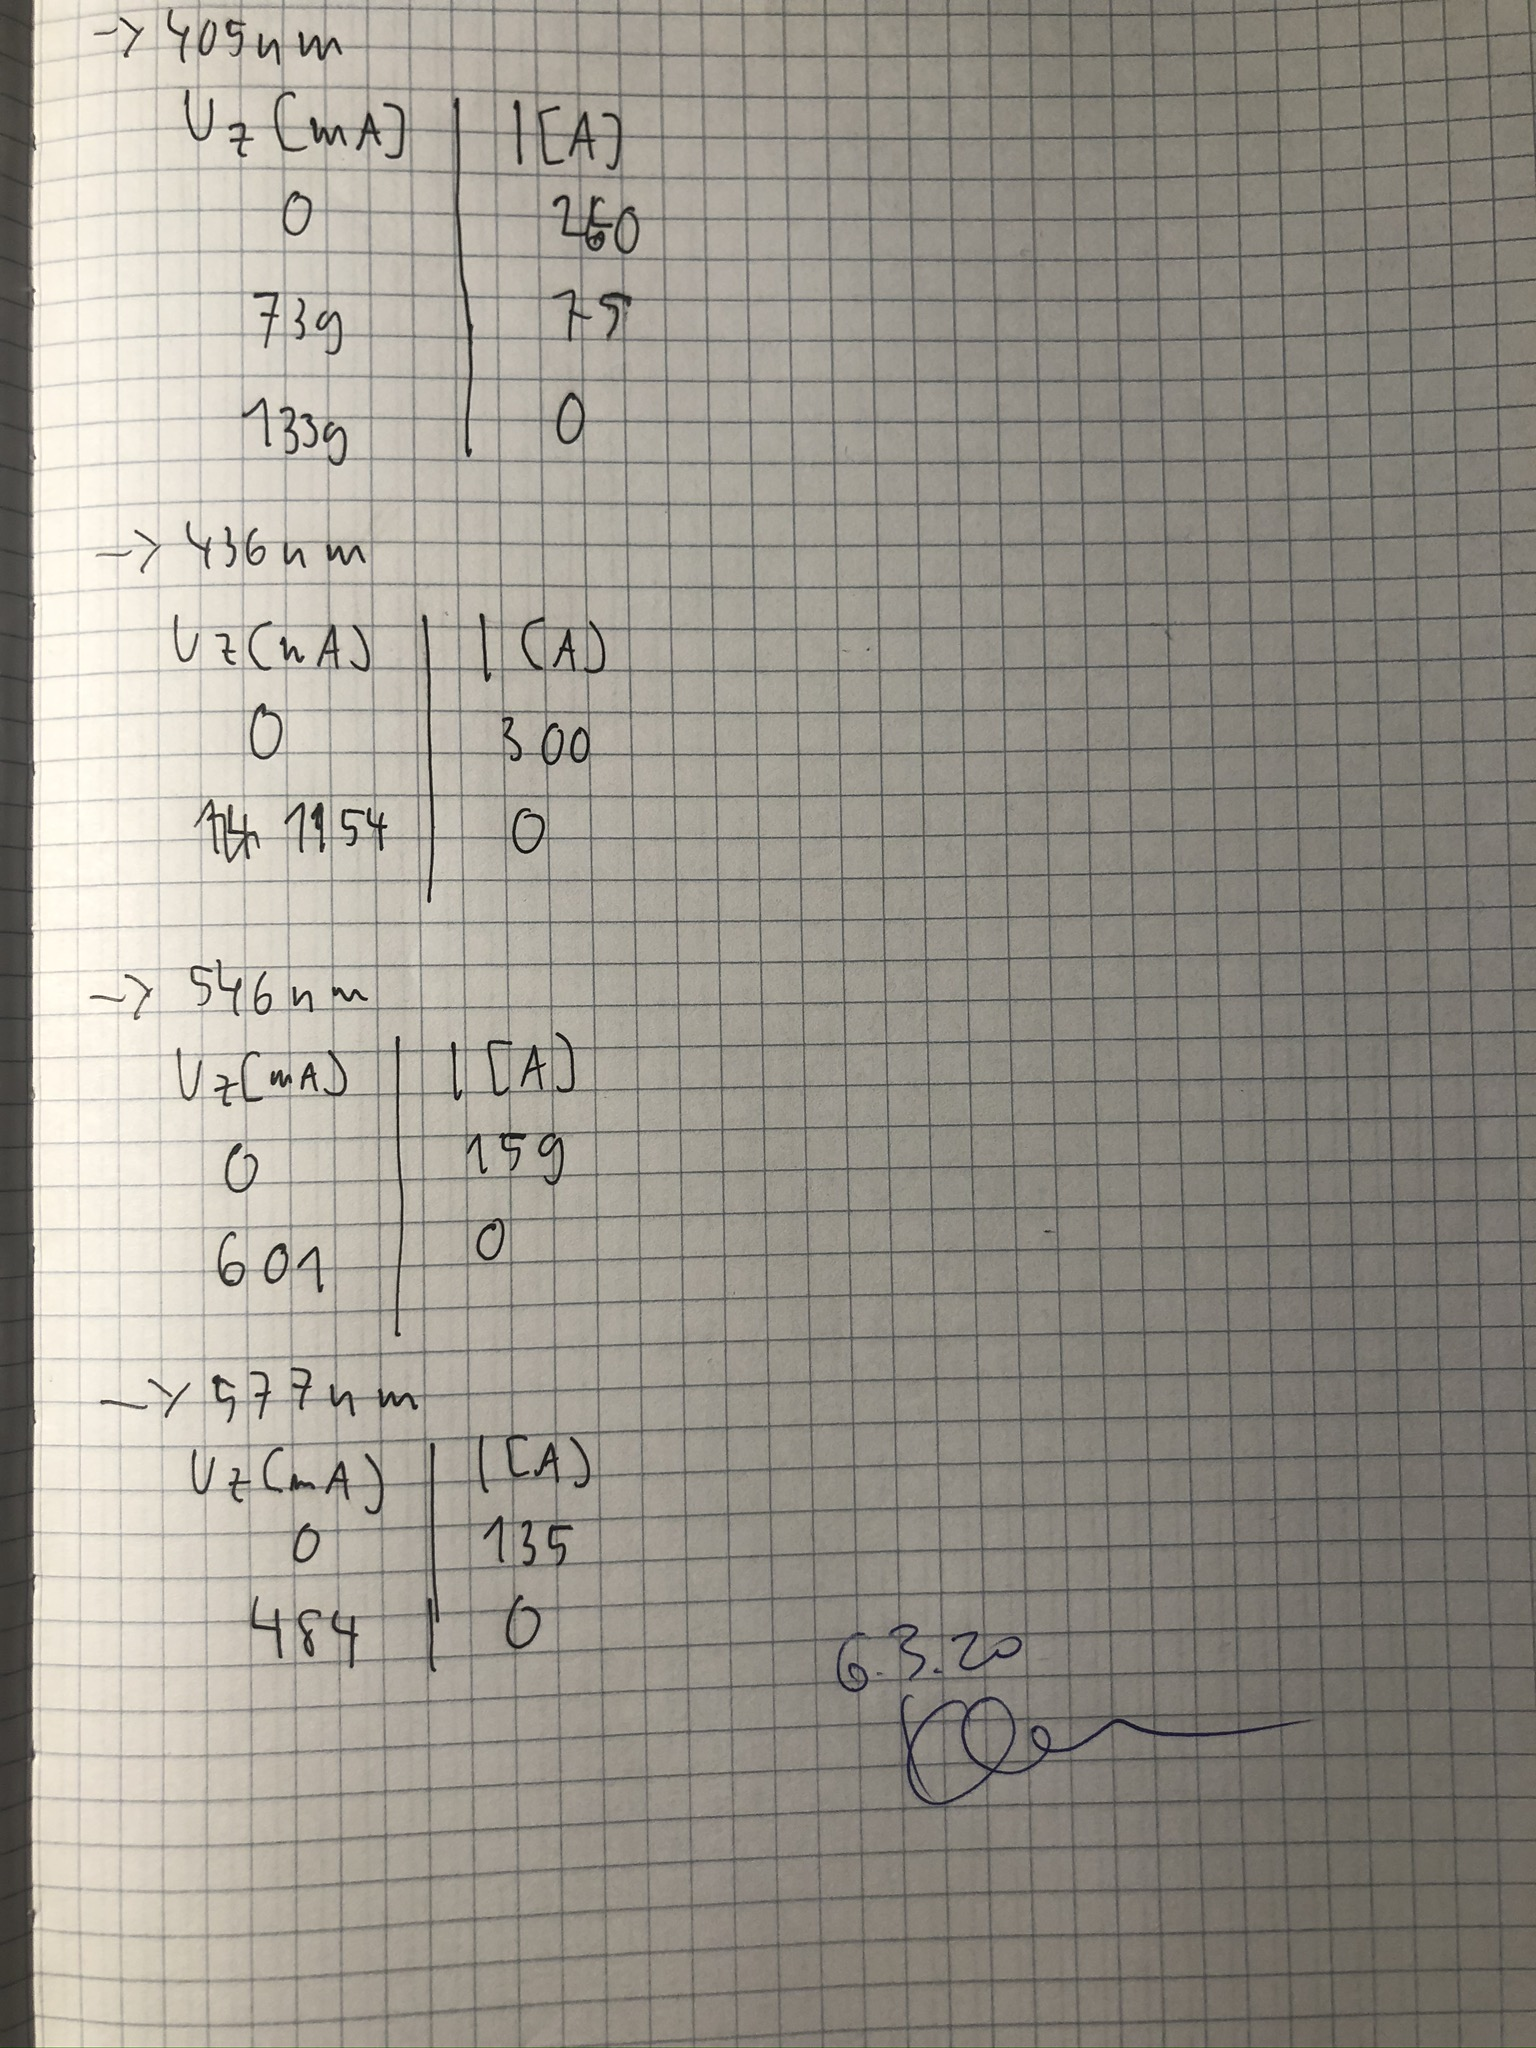

In [69]:
Image(filename='meritve1.JPEG',width=500)

In [57]:
data = pd.read_csv('izstopneU.csv').sort_values(by='U')

lambdas = list(data['lambda']) # nm
Um = list(data['U']) # mV

display(data)

,lambda,U
4,577,484
3,546,601
2,436,1154
1,405,1339
0,365,1677


Na x os postavimo frekvenco z izrazom:
$$ \nu = \frac{c}{\lambda} \cdot s^{-1} $$
Na y os pa zaporne napetosti ($U_m$).

In [58]:
x = [lightspeed/(mu*10**-9) for mu in lambdas]
y = [x/1000 for x in Um]

In [59]:
params = curve_fit(
    fit_func, x, y)
a = params[0][0]
b = params[0][1]

# CALCULATE ERRORS FROM MATRIX
errs = np.sqrt(np.diag(params[1]))
print('naklon grafa: a =', a,'+-',errs[0], '\nb =', b,'+-',errs[1])

naklon grafa: a = 3.93432870439008e-15 +- 3.8145667846944667e-17 
b = -1.559675975009778 +- 0.025684104153770218


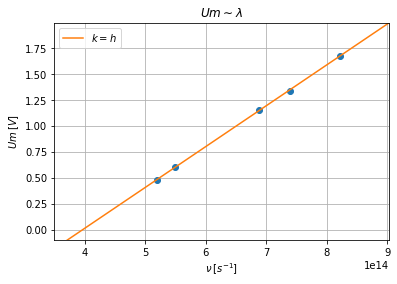

In [60]:
x_fit = np.linspace(0, x[-1]+x[-1]*0.1)

y_fit = fit_func(x_fit, a, b)

plt.plot(x, y, 'o')
plt.plot(x_fit, y_fit, label=r'$k = h$')

plt.title(r'$Um \sim \lambda$')
plt.ylabel(r'$Um \: [V]$')
plt.xlabel(r'$\nu \: [s^{-1}]$')

plt.ylim([-0.1,max(y_fit)])
plt.xlim([3.5*10**14,max(x_fit)])

plt.grid(True)

plt.legend()
plt.show()

Na grafu je vidno, da se zaporna napetost linearno povečuje s frekvenco svetlobe, ki pada na fotocelico. Z samimi meritvami sem tudi dokazal, da manjše frekvence svetlobe nosijo manj energije.
Iz grafa je tudi vidno, da frekvence, ki so manjše od $3.8 \cdot 10^{14} \: s^{-1}$ ne inducirajo toka.

In [61]:
print(1- a/(const.Planck/const.e))

0.048683551795889346


#### Rezultati

$ W_k = e_0 U_m = h \nu - A_i $

Zgornji izraz je v J. Lahko ga pretvorimo v eVs, z deljenjem z osnovnim nabojem ($e_0$)

Planckova konstanta: 
$ h = (3.93 \pm 0.03 )\cdot 10^{-15} \: eVs $

Izstopno delo: 
$ A_i = 1.56 \pm 0.03\: eV $

V teoriji je $ h = 4.1357 \cdot 10^{-15} \: eVs $, kar se od izmerjene razlikuje za: 5%